In [1]:
import numpy as np
import matplotlib as mpl
# mpl.use('pgf')

def textwidth_to_inch(scale):
    fig_width_pt = 427.3153                         # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    return fig_width_pt*inches_per_pt*scale         # width in inches

def figsize(scale):
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = textwidth_to_inch(scale)
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    'axes.titlesize': 10,
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
# mpl.rcParams.update(pgf_with_latex)

import matplotlib.pyplot as plt

# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def savefig(filename):
    plt.savefig('../../text/figures/plots/{}.pgf'.format(filename), bbox_inches='tight')
    plt.savefig('../../text/figures/plots/{}.pdf'.format(filename), bbox_inches='tight')

%matplotlib inline

import pandas as pd

import json
import glob
import os

from math import log
from subprocess import call
from networkit import *

import seaborn as sns
# sns.set_style("whitegrid")
# mpl.rcParams.update(pgf_with_latex)

base_dir = "/net/i11raid/POOL/home/i11/zeitz/ma/"

In [2]:
data = {}

for path in glob.glob(os.path.expanduser(base_dir + "data/results/lfr_params/*.json")):
  for typename, items in json.load(open(path)).items():
    if typename in data:
      data[typename].update(items)
    else:
      data[typename] = items

frames = { typename: pd.DataFrame.from_dict(items, orient='index') for typename, items in data.items() }

algorithm_names = {
    'thrill partitioned louvain': 'DLPLM',
    'thrill node based fully distributed local moving': 'DLSLM',
    'synchronous local moving with map equation': 'DLSLM Map Eq'
}


frames['algorithm_run'].replace({ 'algorithm': algorithm_names }, inplace=True)

In [3]:
def siml(x):
    groud_truth = community.readCommunities(base_dir + "{}.part".format(x['graph'].rsplit('.', 1)[0]))
    
    if 'seq' in x['binary']:
        clustering = community.readCommunities(base_dir + "{}".format(x['path']))
    else: 
        files = sorted(glob.glob(os.path.expanduser(base_dir + "{}*.{}".format(*x['path'].rsplit('.', 1)))))
        call("cat {} > tmp".format(' '.join(files)), shell=True)
        clustering = community.BinaryEdgeListPartitionReader(0, 4).read('tmp')
        call("rm tmp", shell=True)
    g = graph.Graph(groud_truth.numberOfElements())
    nmi = 1.0 - community.NMIDistance().getDissimilarity(g, clustering, groud_truth)
    ari = 1.0 - community.AdjustedRandMeasure().getDissimilarity(g, clustering, groud_truth)
    return pd.Series([nmi, ari])
    
frames['clustering'][['NMI', 'ARI']] = frames['clustering'] \
    .merge(frames['algorithm_run'], left_on='algorithm_run_id', right_index=True) \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .apply(siml, axis=1)

read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m07.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m07.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m06.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m05.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/results/lfr_params/seq_louvain/graph_g3_b2_m05.run1.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m03.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m02.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m07.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/results/lfr_params/seq_louvain/graph_g3_b1_m07.run1.part
read communities from: /net/i11raid/P

read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b2_m06.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m01.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m08.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m04.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m01.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m05.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m03.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b2_m04.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/results/lfr_params/seq_louvain/graph_g2_b2_m04.run1.part
read communities from: /net/i11raid/POOL/home/i11/zeitz

read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m03.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m01.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m03.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m07.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m09.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/results/lfr_params/seq_louvain/graph_g3_b2_m09.run1.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m07.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/results/lfr_params/seq_louvain/graph_g3_b2_m07.run0.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m02.part
read communities from: /net/i11raid/P

read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m09.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m09.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b2_m06.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m04.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m09.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m08.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b2_m06.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b2_m09.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m04.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/results/l

read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b2_m08.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m06.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b2_m08.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m04.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b1_m03.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m02.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m07.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g2_b1_m05.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/graphs/lfr_params/graph_g3_b2_m02.part
read communities from: /net/i11raid/POOL/home/i11/zeitz/ma/data/results/l

In [4]:
frames['program_run'][['gamma', 'beta', 'mu']] = frames['program_run'].apply(lambda x: pd.Series([int(x['graph'][30]), int(x['graph'][33]), int(x['graph'][37]) / 10]), axis=1)

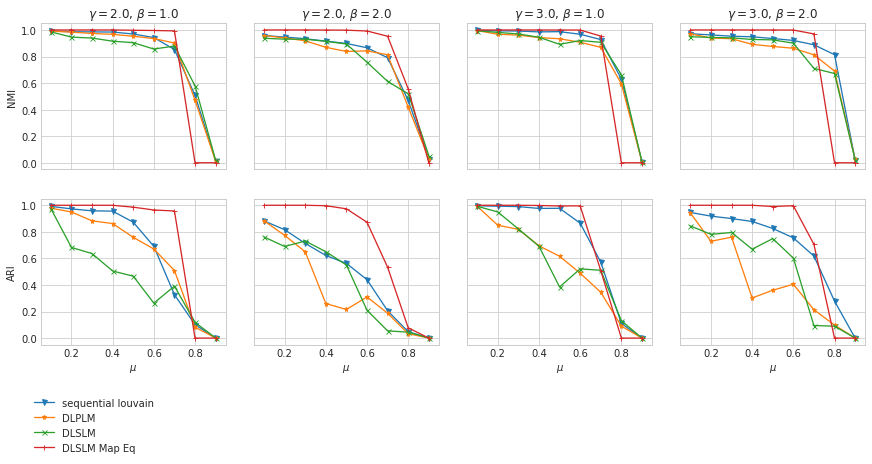

In [11]:
sns.set_context(rc={'lines.markeredgewidth': 0.9, 'lines.linewidth': 1.3, 'lines.markersize': 5})

groups = frames['clustering'] \
    .merge(frames['algorithm_run'], left_on='algorithm_run_id', right_index=True) \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .groupby(['gamma', 'beta'])
    
fig, axes = plt.subplots(2, 4, figsize=(textwidth_to_inch(2.5), textwidth_to_inch(1)));
plt.subplots_adjust(wspace=0.15, hspace=0.2);

pad = 5

for (i, measure) in [(0, 'NMI'), (1, 'ARI')]:
    axes[i][0].set_ylabel(measure)
    for (gamma, beta), group_data in groups:
        j = int((gamma - 2) * 2 + beta - 1)
        group_data.groupby(['mu', 'algorithm'])[measure].mean().unstack()['sequential louvain'] \
            .plot.line(ax=axes[i][j] , xlim=(0.05, 0.95), legend=False, sharey=True, sharex=True, marker='v')
        group_data.groupby(['mu', 'algorithm'])[measure].mean().unstack()['DLPLM'] \
            .plot.line(ax=axes[i][j] , xlim=(0.05, 0.95), legend=False, sharey=True, sharex=True, marker='*')
        group_data.groupby(['mu', 'algorithm'])[measure].mean().unstack()['DLSLM'] \
            .plot.line(ax=axes[i][j] , xlim=(0.05, 0.95), legend=False, sharey=True, sharex=True, marker='x')
        group_data.groupby(['mu', 'algorithm'])[measure].mean().unstack()['DLSLM Map Eq'] \
            .plot.line(ax=axes[i][j] , xlim=(0.05, 0.95), legend=False, sharey=True, sharex=True, marker='+')    
        axes[i][j].set_xlabel("$\mu$")

for (gamma, beta), group_data in groups:
    j = int((gamma - 2) * 2 + beta - 1)
    axes[0][j].set_title("$\gamma = {}$, $\\beta = {}$".format(gamma, beta))

plt.legend(loc = 'lower left', bbox_to_anchor = (0.11,-0.15,1,1), bbox_transform = plt.gcf().transFigure)
# savefig("lfr_params")